In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
import numpy as np

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})

Here we evaluate teh effects of different sorting methods for selecting the two vbf jets. we visualize the distributions for a few signal samples.

In [17]:
df = pd.read_parquet("0--1.parquet")
# df = pd.read_pickle('outfiles/0-2.pkl')
# print(df)
print(df.columns.values.tolist())

# df[('ak8FatJetParticleNet_Th4q', 0)]
# df[('ak8FatJetParticleNetMD_Txbb', 0)]
# df[('ak8FatJetParTMD_THWWvsT', 0)]
# df[('GenHiggsChildren', 1)]

# print(df_sorted_pt[('vbf_cos1_j1', 0)])
# print(df_sorted_pt[('vbfeta', 0)])
print(
    len(
        df[
            (df[("nGoodMuons", 0)] == 0)
            & (df[("nGoodElectrons", 0)] == 0)
            & (df[("nGoodVBFJets", 0)] >= 2)
            & (df[("nGoodJets", 0)] == 0)
        ]
    )
)
print(
    len(
        df[
            (df[("nGoodMuons", 0)] == 0)
            & (df[("nGoodElectrons", 0)] == 0)
            & (df[("vbfNumMatchedGen", 0)] == 2)
            & (df[("nGoodJets", 0)] == 0)
        ]
    )
)
print(len(df), np.sum(df[("vbfNumMatchedGen", 0)] == 2))


print(
    len(
        df[
            (df[("nGoodMuons", 0)] == 0)
            & (df[("nGoodElectrons", 0)] == 0)
            & (df[("nGoodVBFJets", 0)] >= 2)
            & (df[("nGoodJets", 0)] == 0)
            & (np.abs(df[("vbfeta", 0)]) >= 1.5)
            & (np.abs(df[("vbfeta", 1)]) >= 1.5)
        ]
    )
)
print(
    "tjtjt",
    len(
        df[
            (df[("nGoodMuons", 0)] == 0)
            & (df[("nGoodElectrons", 0)] == 0)
            & (df[("vbfNumMatchedGen", 0)] == 2)
            & (df[("nGoodJets", 0)] == 0)
            & (np.abs(df[("vbfeta", 0)]) >= 1.5)
            & (np.abs(df[("vbfeta", 1)]) >= 1.5)
        ]
    ),
)


# before: 69/294 50/294
# None: 74/294 55/294
# On events: 64/294 49/294
# overall test pretty inconclusie but also shows that thingy is pretty insignificant. probably best for filtering initial events since it doesn't initially show much difference

# ('vbfptGen', 0), ('vbfptGen', 1), ('vbfetaGen', 0), ('vbfetaGen', 1), ('vbfphiGen', 0), ('vbfphiGen', 1), ('vbfMGen', 0), ('vbfMGen', 1)
# ('ak8FatJetEta', 0), ('ak8FatJetEta', 1), ('ak8FatJetPhi', 0), ('ak8FatJetPhi', 1), ('ak8FatJetMass', 0), ('ak8FatJetMass', 1), ('ak8FatJetPt', 0), ('ak8FatJetPt', 1)

[('vbfptGen', 0), ('vbfptGen', 1), ('vbfetaGen', 0), ('vbfetaGen', 1), ('vbfphiGen', 0), ('vbfphiGen', 1), ('vbfMGen', 0), ('vbfMGen', 1), ('vbfNumMatchedGen', 0), ('vbfpt', 0), ('vbfpt', 1), ('vbfeta', 0), ('vbfeta', 1), ('vbfphi', 0), ('vbfphi', 1), ('vbfM', 0), ('vbfM', 1), ('nGoodVBFJets', 0), ('vbf_dR_HH', 0), ('vbf_dR_j0_HVV', 0), ('vbf_dR_j1_HVV', 0), ('vbf_dR_j0_Hbb', 0), ('vbf_dR_j1_Hbb', 0), ('vbf_dR_jj', 0), ('vbf_Mass_jj', 0), ('vbf_dEta_jj', 0), ('vbf_cos_j1', 0), ('vbf_cos_j2', 0), ('vbf_prod_centrality', 0), ('ak8FatJetEta', 0), ('ak8FatJetEta', 1), ('ak8FatJetPhi', 0), ('ak8FatJetPhi', 1), ('ak8FatJetMass', 0), ('ak8FatJetMass', 1), ('ak8FatJetPt', 0), ('ak8FatJetPt', 1), ('ak8FatJetMsd', 0), ('ak8FatJetMsd', 1), ('ak8FatJetParticleNetMD_QCD', 0), ('ak8FatJetParticleNetMD_QCD', 1), ('ak8FatJetParticleNetMD_Xbb', 0), ('ak8FatJetParticleNetMD_Xbb', 1), ('ak8FatJetParticleNet_Th4q', 0), ('ak8FatJetParticleNet_Th4q', 1), ('ak8FatJetParticleNetMass', 0), ('ak8FatJetParticleN

bbSkimmer modified gives us the two VBF jets which we will be able to access and manipulate. it also gives us the results of cuts on the events (there needs to be atleast 2 VBF jets). We can apply these filters and graph the kinematic variables. We can also record the before and after applying these cuts. 


In [7]:
# Apply lepton veto selections ($N_\mu =0$ and $N_e=0$)
print(np.shape(df))
df_em = df[(df[("nGoodMuons", 0)] == 0) & (df[("nGoodElectrons", 0)] == 0)]

# 2 vbf jets
# df_vbf = df[ (df[('nGoodVBFJetsUnsorted', 0)] >= 2)]

# lepton veto and 2 vbf jets
# df_unsorted = df[(df[('nGoodMuons', 0)] == 0) & (df[('nGoodElectrons', 0)] == 0) & (df[('nGoodVBFJetsUnsorted', 0)] >= 2)& (df[('nGoodJets', 0)] == 0)]
df_sorted_pt = df[
    (df[("nGoodMuons", 0)] == 0)
    & (df[("nGoodElectrons", 0)] == 0)
    & (df[("nGoodVBFJets", 0)] >= 2)
    & (df[("nGoodJets", 0)] == 0)
]
# df_sorted_M = df[(df[('nGoodMuons', 0)] == 0) & (df[('nGoodElectrons', 0)] == 0) & (df[('nGoodVBFJetsSortedM', 0)] >= 2)& (df[('nGoodJets', 0)] == 0)]
# df_sorted_eta = df[(df[('nGoodMuons', 0)] == 0) & (df[('nGoodElectrons', 0)] == 0) & (df[('nGoodVBFJetsSortedeta', 0)] >= 2)& (df[('nGoodJets', 0)] == 0)]


# generate all variables that are needed for the ak8 jet selections in VBF HH4b paper.
# df[('DijetDeltaPhi', 0)] = np.abs(df[('ak8FatJetPhi', 0)] - df[('ak8FatJetPhi', 1)])
# df[('DijetDeltaEta', 0)] = np.abs(df[('ak8FatJetEta', 0)] - df[('ak8FatJetEta', 1)])
# print(np.shape(df)[0],np.shape(df_unsorted)[0],np.shape(df_sorted_pt)[0],np.shape(df_sorted_M)[0],np.shape(df_sorted_eta)[0])

(294, 132)


Graphing the variables for our fatjets:

KeyError: ('DijetDeltaPhi', 0)

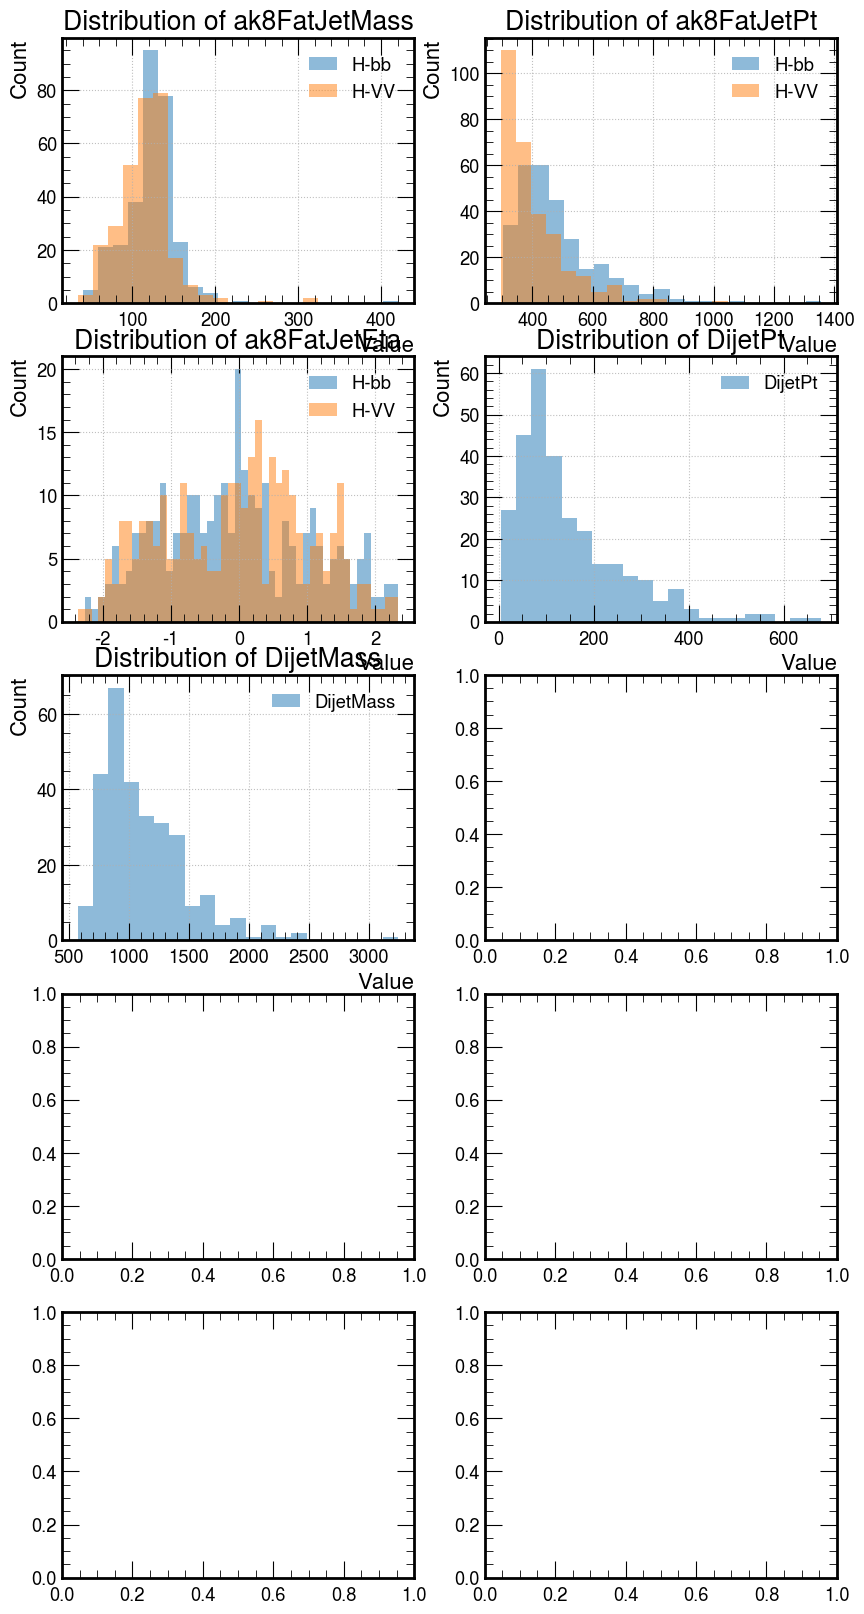

In [8]:
variables = [
    "ak8FatJetMass",
    "ak8FatJetPt",
    "ak8FatJetEta",
    "DijetPt",
    "DijetMass",
    "DijetDeltaPhi",
    "DijetDeltaEta",
    "nGoodJets",
    "vbfpt",
    "vbfM",
]

# Determine grid size:
grid_size = (np.ceil(len(variables) / 2).astype(int), 2)

binnums = 20

fig, axs = plt.subplots(*grid_size, figsize=(10, 4 * grid_size[0]))
axs = axs.flatten()  # Flatten to 1D for easier iteration

# Loop over variables and their corresponding subplots
for ax, var in zip(axs, variables):
    # Check if variable has two entries (0 and 1)
    if (var, 1) in df.columns:
        for i, label in zip([0, 1], ["H-bb", "H-VV"]):
            column = df[(var, i)]
            if i == 0:
                binwidth = int((max(column) - min(column)) / binnums) + 0.1
            ax.hist(
                column,
                bins=np.arange(min(column), max(column) + binwidth, binwidth),
                alpha=0.5,
                label=label,
            )
    else:  # Variable has only one entry (0)
        column = df[(var, 0)]
        binwidth = int((max(column) - min(column)) / binnums) + 0.1
        ax.hist(
            column,
            bins=np.arange(min(column), max(column) + binwidth, binwidth),
            alpha=0.5,
            label=var,
        )

    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {var}")
    ax.legend()
    ax.grid(True)

# Remove unused subplots
if len(variables) < len(axs):
    for ax in axs[len(variables) :]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

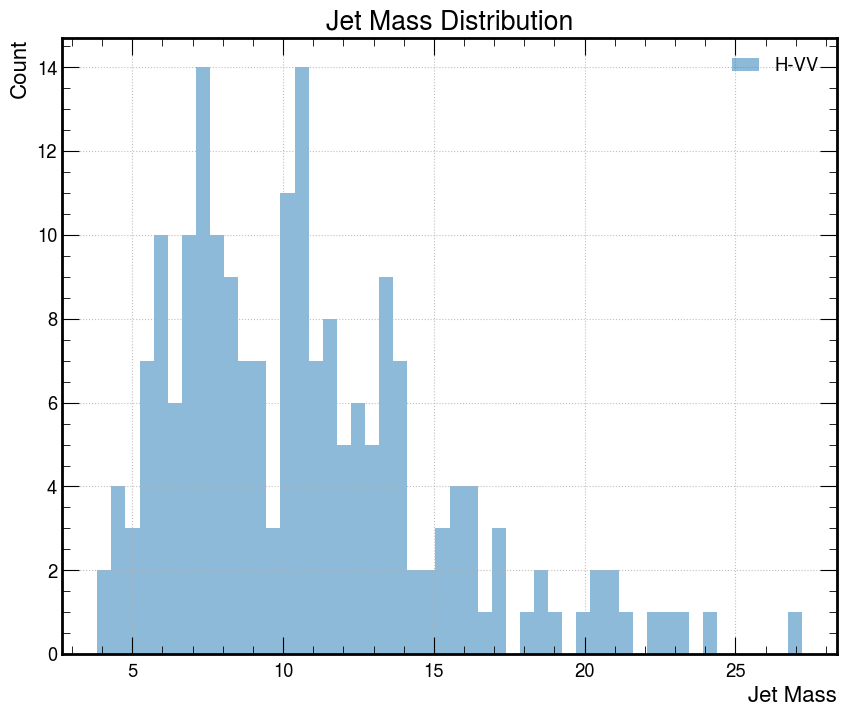

In [47]:
# example plotting masses of fatjets.
ak8FatJetMass_bb = df[("vbfM", 0)]  # Mass of H-bb
ak8FatJetMass_vv = df[("vbfM", 1)]  # Mass of H-VV

plt.figure(figsize=(10, 8))

# plot histogram for H-bb
plt.hist(
    ak8FatJetMass_bb, bins=range(min(data), max(data) + binwidth, binwidth), alpha=0.5, label="H-bb"
)

# plot histogram for H-VV
plt.hist(ak8FatJetMass_vv, bins=50, alpha=0.5, label="H-VV")

plt.xlabel("Jet Mass")
plt.ylabel("Count")
plt.title("Jet Mass Distribution")
plt.legend()
plt.grid(True)
plt.show()

Graphing the vbf jet variables with diffenent sorts.

In [23]:
def process_and_plot(df, sort_type, custom_variables=None):
    # Variables for each sorting type
    variables_dict = {
        "Sortedpt": ["vbfptSortedpt", "vbfetaSortedpt", "vbfphiSortedpt", "vbfMSortedpt"],
        "SortedM": ["vbfptSortedM", "vbfetaSortedM", "vbfphiSortedM", "vbfMSortedM"],
        "Sortedeta": ["vbfptSortedeta", "vbfetaSortedeta", "vbfphiSortedeta", "vbfMSortedeta"],
        "Unsorted": ["nGoodVBFJetsUnsorted"],
    }

    # Retrieve the corresponding variables
    variables = variables_dict.get(sort_type)

    # Add custom variables if provided
    if custom_variables:
        variables += custom_variables

    # Apply mask to dataframe based on the sort_type
    df = df[
        (df[("nGoodMuons", 0)] == 0)
        & (df[("nGoodElectrons", 0)] == 0)
        & (df[(f"nGoodVBFJets{sort_type}", 0)] >= 2)
        & (df[("nGoodJets", 0)] == 0)
    ]

    # Determine grid size:
    grid_size = (np.ceil(len(variables) / 2).astype(int), 2)

    fig, axs = plt.subplots(*grid_size, figsize=(10, 4 * grid_size[0]))
    axs = axs.flatten()  # Flatten to 1D for easier iteration

    # Loop over variables and their corresponding subplots
    for ax, var in zip(axs, variables):
        # Determine bins based on variable type
        if "pt" in var:
            bins = np.linspace(0, 1500, 51)
        elif "mass" in var:
            bins = np.linspace(0, 3000, 51)
        elif "phi" in var:
            bins = np.linspace(0, 5, 51)
        else:
            bins = 50  # default binning if variable type is not recognized
        if "vbfpt" in var:
            bins = np.linspace(0, 500, 51)
        if "vbfeta" in var:
            bins = np.linspace(-5, 5, 51)
        if "vbfM" in var:
            bins = np.linspace(0, 100, 51)
        if "vbfphi" in var:
            bins = np.linspace(-1, 5, 51)

        # Check if variable has two entries (0 and 1)
        if (var, 1) in df.columns:
            for i in [0, 1]:
                column = df[(var, i)]
                ax.hist(column, bins=bins, alpha=0.5, label=f"Jet {i+1}")
        else:  # Variable has only one entry (0)
            column = df[(var, 0)]
            ax.hist(column, bins=bins, alpha=0.5, label=var)

        ax.set_xlabel("Value")
        ax.set_ylabel("Count")
        ax.set_title(f"Distribution of {var}")
        ax.legend()
        ax.grid(True)

    # Remove unused subplots
    if len(variables) < len(axs):
        for ax in axs[len(variables) :]:
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

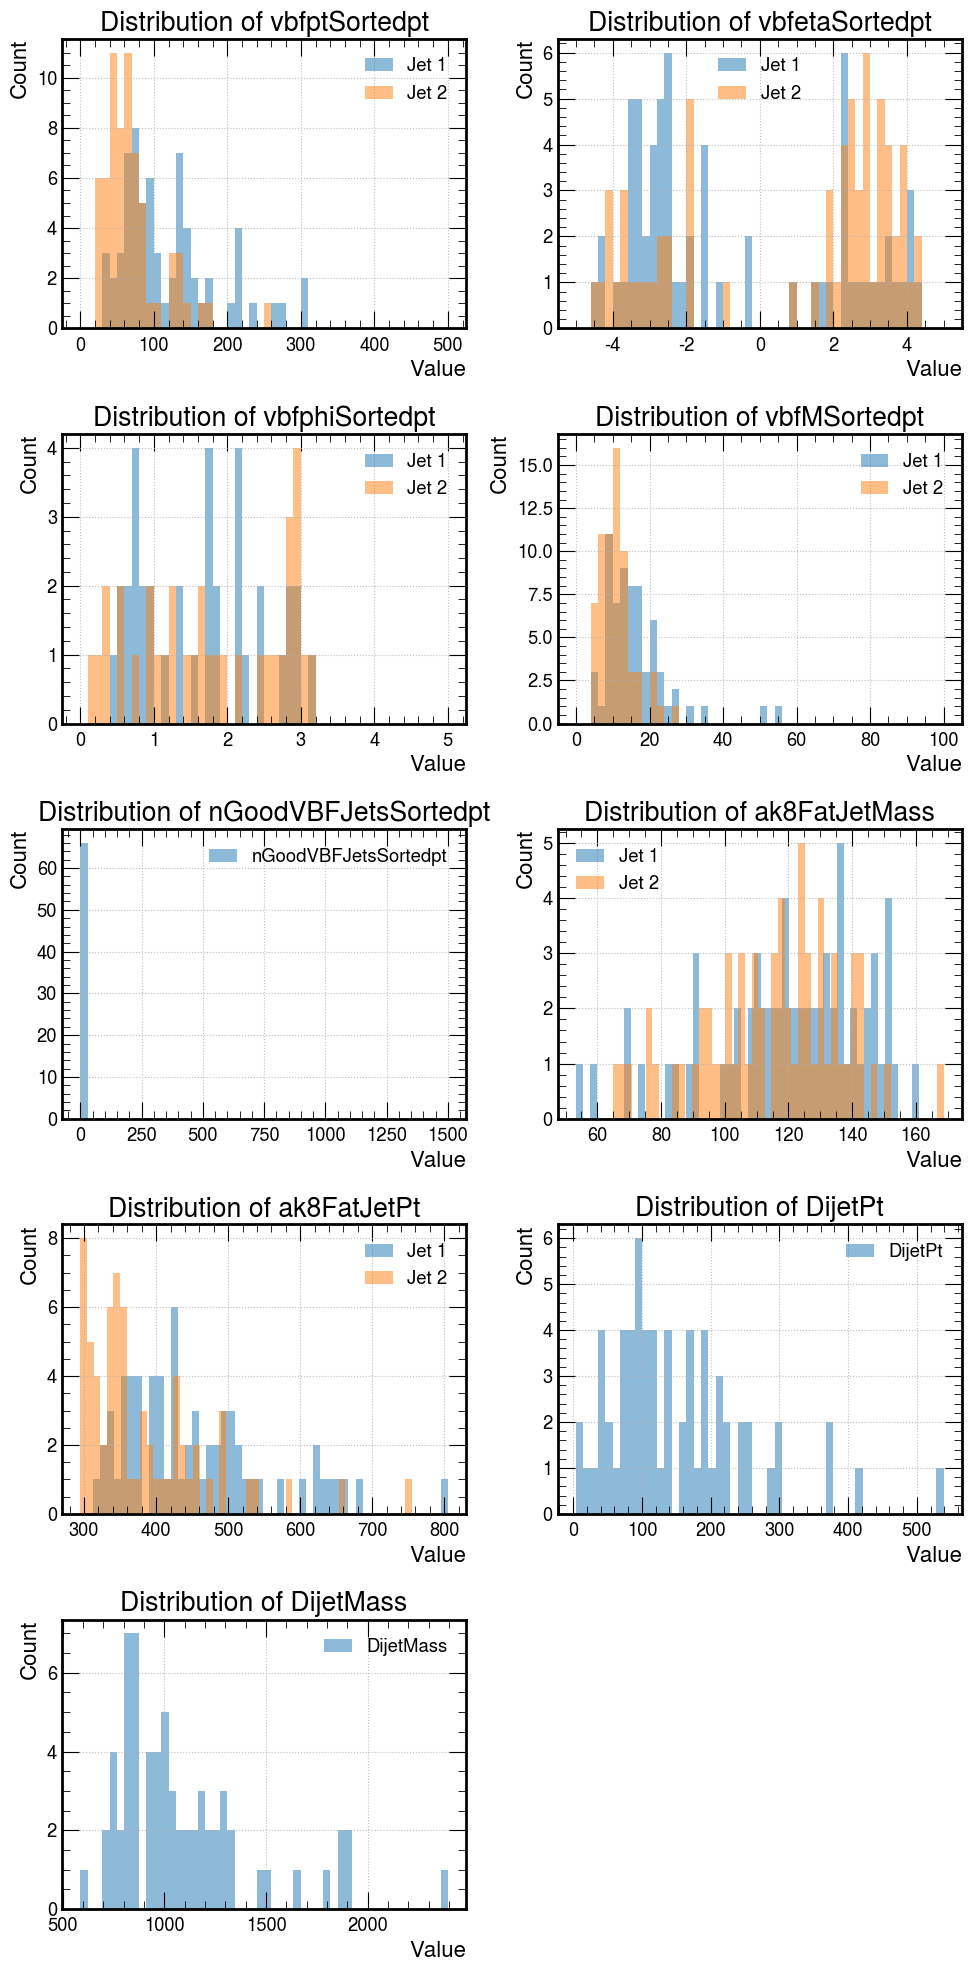

In [22]:
variables = ["ak8FatJetMass", "ak8FatJetPt", "DijetPt", "DijetMass"]
# df = pd.read_parquet('0--1.parquet')
process_and_plot(df, "Sortedpt", variables)
#'Unsorted': ['vbfptUnsorted','vbfetaUnsorted','vbfphiUnsorted','vbfMUnsorted','nGoodVBFJetsUnsorted']

In [12]:
def process_and_plot_all(df, num_bin=50, custom_variables=None):
    # Variables for each sorting type
    variables_dict = {
        "Unsorted": [
            "vbfptUnsorted",
            "vbfetaUnsorted",
            "vbfphiUnsorted",
            "vbfMUnsorted",
            "nGoodVBFJetsUnsorted",
        ],
        "Sortedpt": [
            "vbfptSortedpt",
            "vbfetaSortedpt",
            "vbfphiSortedpt",
            "vbfMSortedpt",
            "nGoodVBFJetsSortedpt",
        ],
        "SortedM": [
            "vbfptSortedM",
            "vbfetaSortedM",
            "vbfphiSortedM",
            "vbfMSortedM",
            "nGoodVBFJetsSortedM",
        ],
        "Sortedeta": [
            "vbfptSortedeta",
            "vbfetaSortedeta",
            "vbfphiSortedeta",
            "vbfMSortedeta",
            "nGoodVBFJetsSortedeta",
        ],
    }

    # Add custom variables if provided
    if custom_variables:
        for sort_type in variables_dict.keys():
            variables_dict[sort_type] += custom_variables

    # Determine grid size
    grid_size = (max(len(vars) for vars in variables_dict.values()), len(variables_dict))

    fig, axs = plt.subplots(*grid_size, figsize=(10 * grid_size[1], 4 * grid_size[0]))

    # Loop over sorting types and their corresponding subplot columns
    for sort_type, col_axs in zip(variables_dict.keys(), axs.T):
        # Apply mask to dataframe based on the sort_type
        df_filtered = df[
            (df[("nGoodMuons", 0)] == 0)
            & (df[("nGoodElectrons", 0)] == 0)
            & (df[(f"nGoodVBFJets{sort_type}", 0)] >= 2)
            & (df[("nGoodJets", 0)] == 0)
        ]

        # Loop over variables and their corresponding subplots
        for ax, var in zip(col_axs, variables_dict[sort_type]):
            # Determine bins based on variable type
            if "pt" in var:
                bins = np.linspace(0, 1500, num_bin + 1)
            elif "mass" in var:
                bins = np.linspace(0, 3000, num_bin + 1)
            elif "phi" in var:
                bins = np.linspace(0, 5, num_bin + 1)
            else:
                bins = num_bin  # default binning if variable type is not recognized

            if "vbfpt" in var:
                bins = np.linspace(0, 500, num_bin + 1)
            if "vbfeta" in var:
                bins = np.linspace(-5, 5, num_bin + 1)
            if "vbfM" in var:
                bins = np.linspace(0, 100, num_bin + 1)
            if "vbfphi" in var:
                bins = np.linspace(-1, 5, num_bin + 1)

            weights = df_filtered[("weight", 0)]

            # Check if variable has two entries (0 and 1)
            if (var, 1) in df_filtered.columns:
                for i in [0, 1]:
                    column = df_filtered[(var, i)]
                    ax.hist(
                        column,
                        bins=bins,
                        alpha=0.5,
                        label=f"Jet {i+1}",
                        density=True,
                        weights=weights,
                    )
            else:  # Variable has only one entry (0)
                column = df_filtered[(var, 0)]
                ax.hist(column, bins=bins, alpha=0.5, label=var, density=True, weights=weights)

            ax.set_xlabel("Value")
            ax.set_ylabel("Count")
            ax.set_title(f"Distribution of {var} ({sort_type})")
            ax.legend()
            ax.grid(True)

        # Remove unused subplots
        for ax in col_axs[len(variables_dict[sort_type]) :]:
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

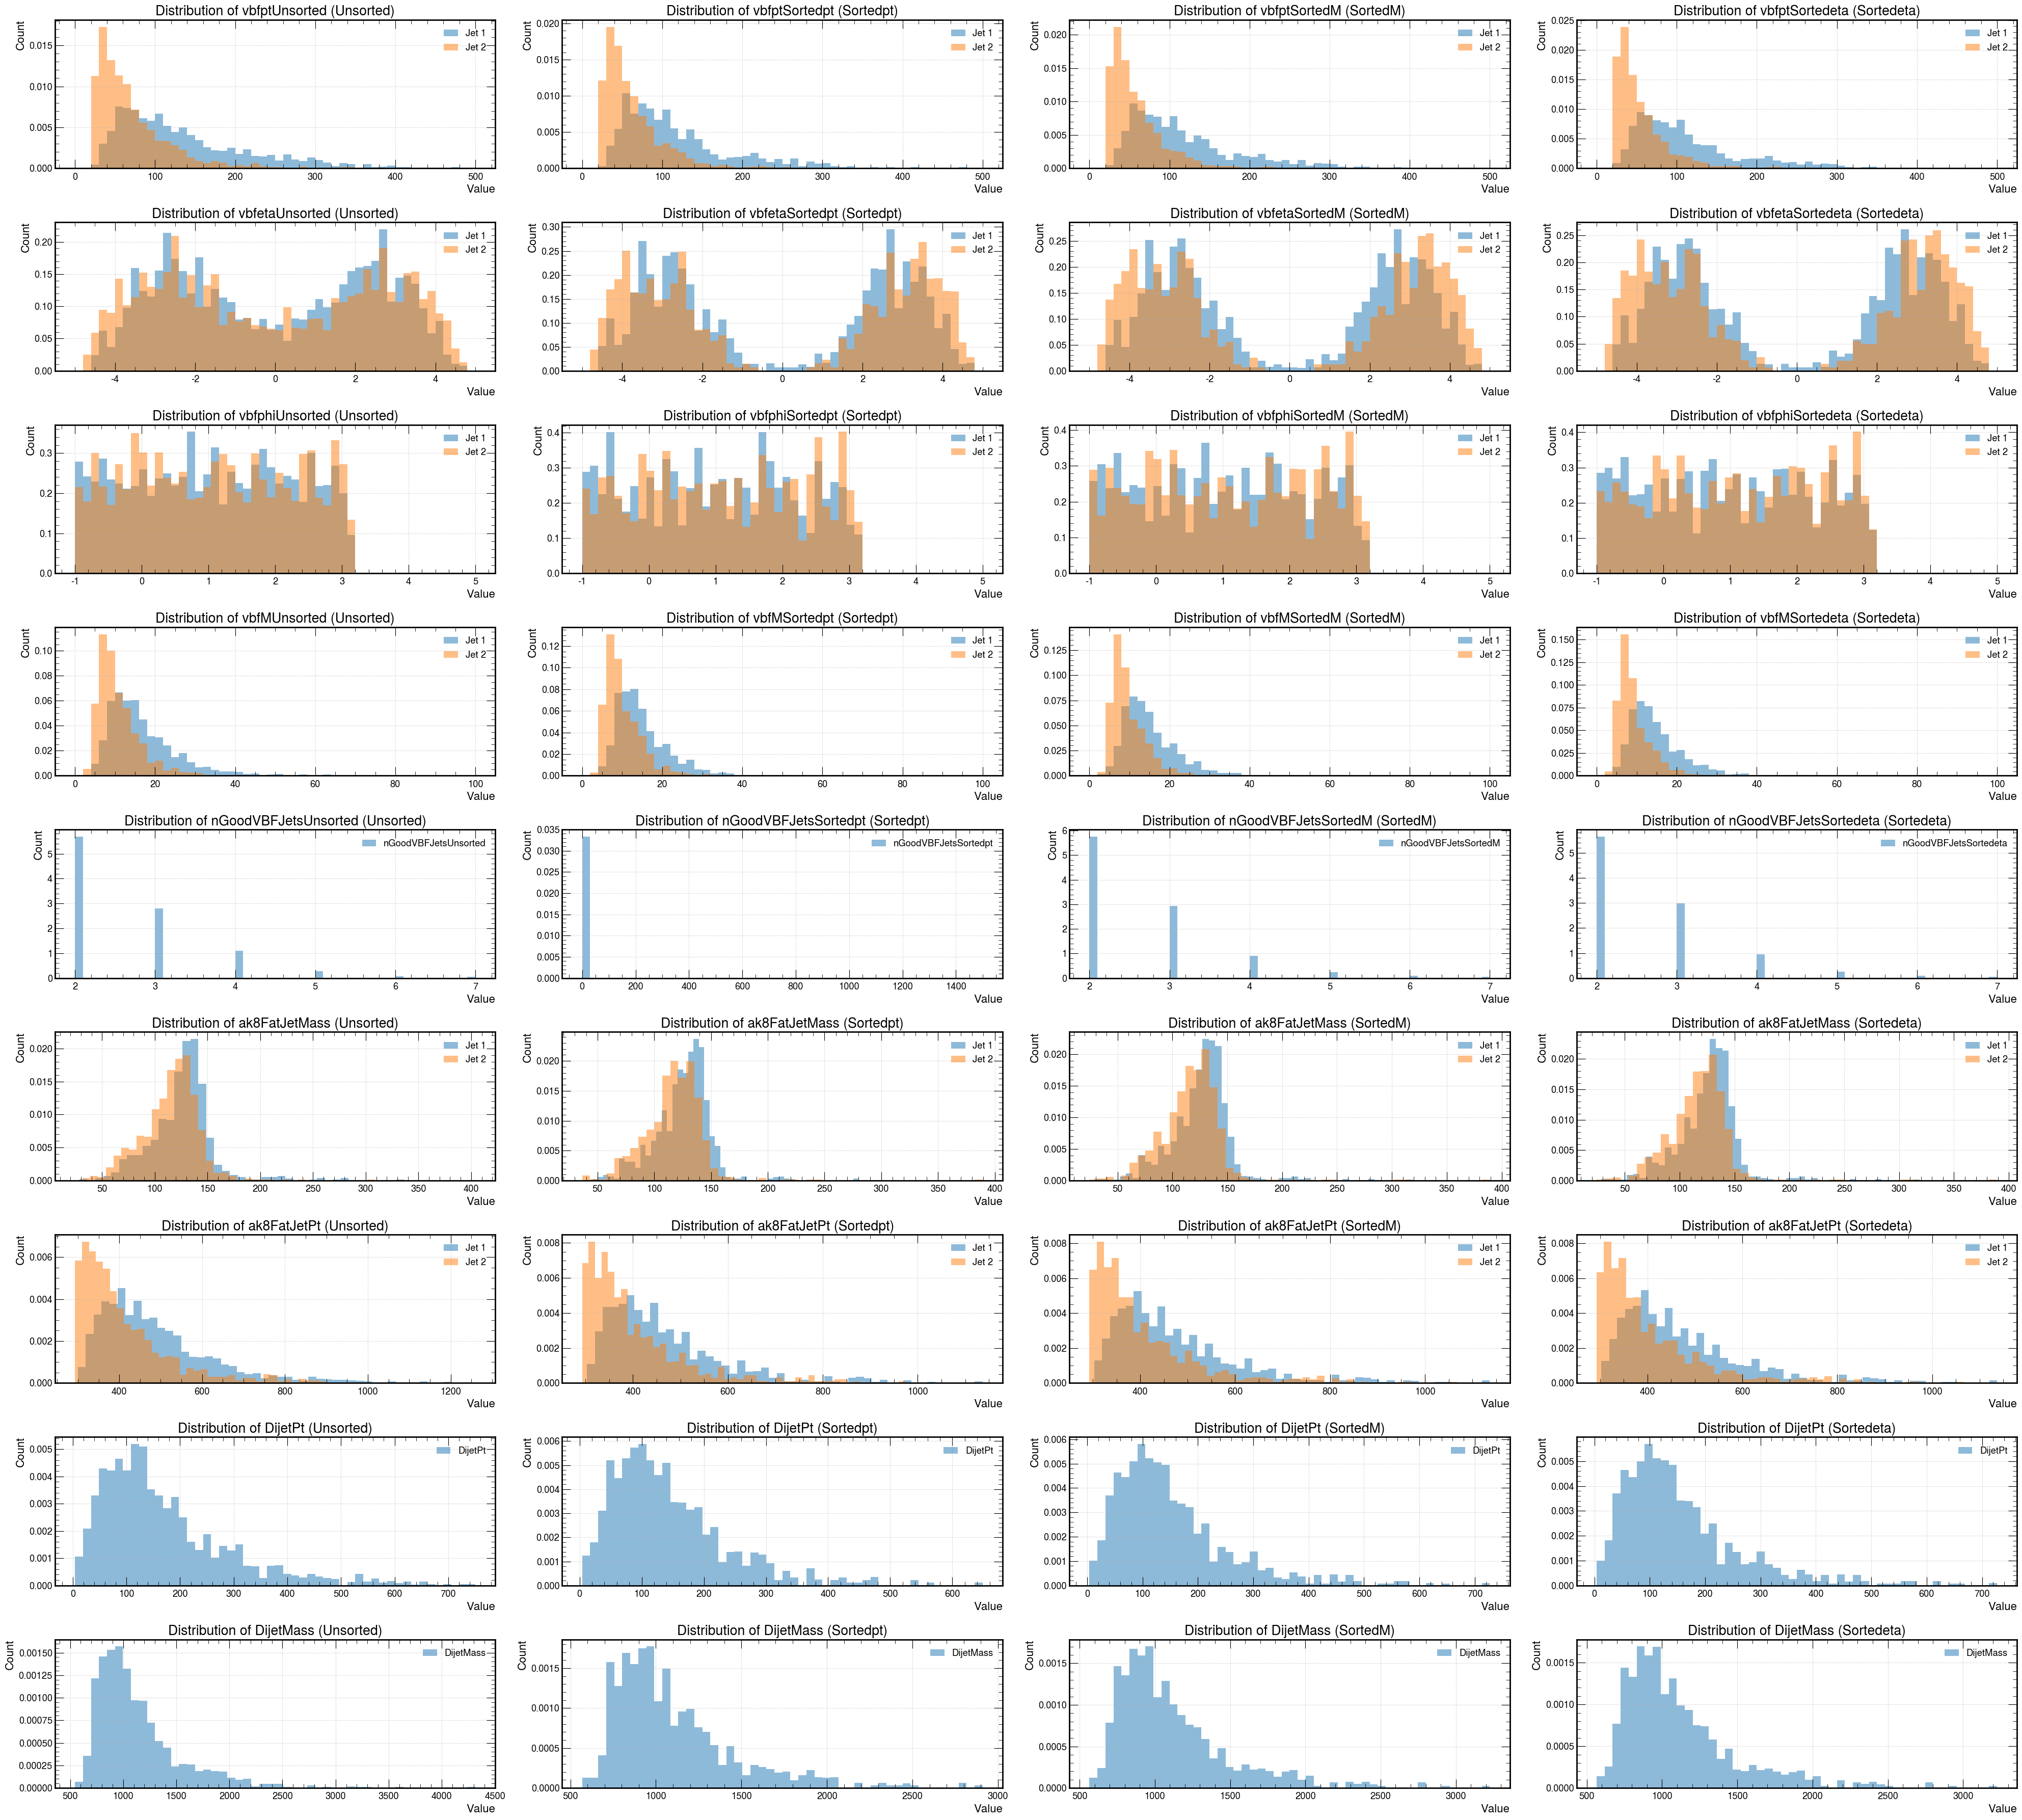

In [13]:
variables = ["ak8FatJetMass", "ak8FatJetPt", "DijetPt", "DijetMass"]
df = pd.read_parquet("0-10.parquet")
process_and_plot_all(df, num_bin=50, custom_variables=variables)
#'Unsorted': ['vbfptUnsorted','vbfetaUnsorted','vbfphiUnsorted','vbfMUnsorted','nGoodVBFJetsUnsorted']

In [18]:
def compare_filter_effects(df):
    # Variables for each sorting type
    sort_types = ["Unsorted", "Sortedpt", "SortedM", "Sortedeta"]

    # Different masks to apply
    masks = [
        ("No Muons", df[("nGoodMuons", 0)] == 0),
        ("No Electrons", df[("nGoodElectrons", 0)] == 0),
        ("tt BG mask", df[("nGoodJets", 0)] == 0),
    ]

    # Create an empty dataframe to store the results
    results = pd.DataFrame(columns=["Sorting Method/Mask", "Weighted Number of Jets"])

    # Include original DataFrame first
    weighted_jet_count = df[("weight", 0)].sum()
    original_row = pd.DataFrame(
        {"Sorting Method/Mask": ["Original"], "Weighted Number of Jets": [weighted_jet_count]}
    )
    results = pd.concat([results, original_row], ignore_index=True)

    # Loop over sort types and masks
    for sort_type in sort_types:
        df_temp = df.copy()  # Work with a copy of the original dataframe

        for mask_name, mask in masks:
            df_temp = df_temp[mask]  # Apply the mask

        # 'At least 2 VBF Jets' mask is a function, apply it separately
        df_temp = df_temp[df_temp[(f"nGoodVBFJets{sort_type}", 0)] >= 2]
        mask_name = "At least 2 VBF Jets"

        # Store the number of remaining jets along with the corresponding sorting method and mask
        # Instead of counting rows, sum the weights
        weighted_jet_count = df_temp[("weight", 0)].sum()
        new_row = pd.DataFrame(
            {
                "Sorting Method/Mask": [f"{sort_type} - {mask_name}"],
                "Weighted Number of Jets": [weighted_jet_count],
            }
        )
        results = pd.concat([results, new_row], ignore_index=True)

    return results


# Now you can use this function and display the result as a pandas DataFrame:
results = compare_filter_effects(df)
display(results)

print(np.shape(df)[0])

/tmp/ipykernel_3638209/971286838.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]  # Apply the mask
/tmp/ipykernel_3638209/971286838.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]  # Apply the mask
/tmp/ipykernel_3638209/971286838.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]  # Apply the mask
/tmp/ipykernel_3638209/971286838.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]  # Apply the mask
/tmp/ipykernel_3638209/971286838.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]  # Apply the mask
/tmp/ipykernel_3638209/971286838.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]  # Apply the mask
/tmp/ipykernel_3638209/971286838.py:25: 

,Sorting Method/Mask,Weighted Number of Jets
0,Original,38888.742185
1,Unsorted - At least 2 VBF Jets,18855.039593
2,Sortedpt - At least 2 VBF Jets,8862.773588
3,SortedM - At least 2 VBF Jets,10531.169935
4,Sortedeta - At least 2 VBF Jets,10731.495320


2901


In [49]:
import itertools


def compare_filter_effects(df):
    # Variables for each sorting type
    sort_types = ["Unsorted", "Sortedpt", "SortedM", "Sortedeta"]

    # Different masks to apply
    masks = [
        ("No Muons", df[("nGoodMuons", 0)] == 0),
        ("No Electrons", df[("nGoodElectrons", 0)] == 0),
        ("tt BG mask", df[("nGoodJets", 0)] == 0),
    ]

    # Create an empty dataframe to store the results
    results = pd.DataFrame(columns=["Sorting Method/Mask", "Number of Jets"])

    # Loop over sort types
    for sort_type in sort_types:
        # Loop over all possible lengths of mask combinations
        for r in range(len(masks) + 1):
            # Loop over all possible combinations of masks of length r
            for mask_combination in itertools.combinations(masks, r):
                df_temp = df.copy()  # Work with a copy of the original dataframe

                # Generate the mask combination name (sort_type + mask names)
                mask_combination_names = [mask_name for mask_name, _ in mask_combination]
                mask_name = (
                    f"{sort_type} - " + ", ".join(mask_combination_names)
                    if mask_combination_names
                    else sort_type
                )

                # Apply each mask in the combination
                for _, mask in mask_combination:
                    df_temp = df_temp[mask]

                # 'At least 2 VBF Jets' mask is a function, apply it separately
                df_temp = df_temp[df_temp[(f"nGoodVBFJets{sort_type}", 0)] >= 2]
                mask_name += ", At least 2 VBF Jets"

                # Store the number of remaining jets along with the corresponding sorting method and mask
                new_row = pd.DataFrame(
                    {"Sorting Method/Mask": [mask_name], "Number of Jets": [np.shape(df_temp)[0]]}
                )
                results = pd.concat([results, new_row], ignore_index=True)

    return results


# Now you can use this function and display the result as a pandas DataFrame:
results = compare_filter_effects(df)
display(results)

/tmp/ipykernel_2795089/2696378952.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]
/tmp/ipykernel_2795089/2696378952.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]
/tmp/ipykernel_2795089/2696378952.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]
/tmp/ipykernel_2795089/2696378952.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]
/tmp/ipykernel_2795089/2696378952.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]
/tmp/ipykernel_2795089/2696378952.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]
/tmp/ipykernel_2795089/2696378952.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[mask]

,Sorting Method/Mask,Number of Jets
0,"Unsorted, At least 2 VBF Jets",1989
1,"Unsorted - No Muons, At least 2 VBF Jets",1939
2,"Unsorted - No Electrons, At least 2 VBF Jets",1983
3,"Unsorted - tt BG mask, At least 2 VBF Jets",1452
4,"Unsorted - No Muons, No Electrons, At least 2 ...",1933
5,"Unsorted - No Muons, tt BG mask, At least 2 VB...",1415
6,"Unsorted - No Electrons, tt BG mask, At least ...",1448
7,"Unsorted - No Muons, No Electrons, tt BG mask,...",1411
8,"Sortedpt, At least 2 VBF Jets",916
9,"Sortedpt - No Muons, At least 2 VBF Jets",888


In [11]:
df[("weight", 0)]

0       13.097274
1       13.859143
2       13.187113
3       12.276107
4       12.276107
          ...    
2896    13.266966
2897    13.430860
2898    11.011676
2899    13.450849
2900    13.092185
Name: (weight, 0), Length: 2901, dtype: float64

Plotting potential bdt variables with qcd sample and signal sample to see if there are good differences we can use (HWW tagger scores not included since no inference was used)

In [95]:
def apply_selection(df):
    print(df.columns.values.tolist())

    Hbb_mask = df[("ak8FatJetParticleNetMD_Txbb", 0)] > df[("ak8FatJetParticleNetMD_Txbb", 1)]
    Hbb_Txbb_values = np.where(
        Hbb_mask, df[("ak8FatJetParticleNetMD_Txbb", 0)], df[("ak8FatJetParticleNetMD_Txbb", 1)]
    )
    HVV_Th4q_values = np.where(
        ~Hbb_mask, df[("ak8FatJetParticleNet_Th4q", 0)], df[("ak8FatJetParticleNet_Th4q", 1)]
    )
    m = (Hbb_Txbb_values >= -0.95) & (HVV_Th4q_values >= -0.6)
    m = (
        m
        & (df[("nGoodMuons", 0)] == 0)
        & (df[("nGoodElectrons", 0)] == 0)
        & (df[("nGoodJets", 0)] == 0)
        & (df[("nGoodVBFJets", 0)] >= 2)
    )

    return df[m]


df1 = pd.read_parquet("0-5signal.parquet")
df1 = apply_selection(df1)

df2 = pd.read_parquet("0-5.parquet")
print(df2)
df2 = apply_selection(df2)
df1.columns.values.tolist()
# df2[('vbf_dR_j0_Hbb', 0)]
# df2[('vbf_dEta_jj', 0)]

[('GenHiggsEta', 0), ('GenHiggsEta', 1), ('GenHiggsPhi', 0), ('GenHiggsPhi', 1), ('GenHiggsMass', 0), ('GenHiggsMass', 1), ('GenHiggsPt', 0), ('GenHiggsPt', 1), ('GenHiggsChildren', 0), ('GenHiggsChildren', 1), ('GenbbEta', 0), ('GenbbEta', 1), ('GenbbPhi', 0), ('GenbbPhi', 1), ('GenbbMass', 0), ('GenbbMass', 1), ('GenbbPt', 0), ('GenbbPt', 1), ('GenVVEta', 0), ('GenVVEta', 1), ('GenVVPhi', 0), ('GenVVPhi', 1), ('GenVVMass', 0), ('GenVVMass', 1), ('GenVVPt', 0), ('GenVVPt', 1), ('Gen4qEta', 0), ('Gen4qEta', 1), ('Gen4qEta', 2), ('Gen4qEta', 3), ('Gen4qPhi', 0), ('Gen4qPhi', 1), ('Gen4qPhi', 2), ('Gen4qPhi', 3), ('Gen4qMass', 0), ('Gen4qMass', 1), ('Gen4qMass', 2), ('Gen4qMass', 3), ('Gen4qPt', 0), ('Gen4qPt', 1), ('Gen4qPt', 2), ('Gen4qPt', 3), ('ak8FatJetHbb', 0), ('ak8FatJetHbb', 1), ('ak8FatJetHVV', 0), ('ak8FatJetHVV', 1), ('ak8FatJetHVVNumProngs', 0), ('vbfptGen', 0), ('vbfptGen', 1), ('vbfetaGen', 0), ('vbfetaGen', 1), ('vbfphiGen', 0), ('vbfphiGen', 1), ('vbfMGen', 0), ('vbfMGen

[('GenHiggsEta', 0),
 ('GenHiggsEta', 1),
 ('GenHiggsPhi', 0),
 ('GenHiggsPhi', 1),
 ('GenHiggsMass', 0),
 ('GenHiggsMass', 1),
 ('GenHiggsPt', 0),
 ('GenHiggsPt', 1),
 ('GenHiggsChildren', 0),
 ('GenHiggsChildren', 1),
 ('GenbbEta', 0),
 ('GenbbEta', 1),
 ('GenbbPhi', 0),
 ('GenbbPhi', 1),
 ('GenbbMass', 0),
 ('GenbbMass', 1),
 ('GenbbPt', 0),
 ('GenbbPt', 1),
 ('GenVVEta', 0),
 ('GenVVEta', 1),
 ('GenVVPhi', 0),
 ('GenVVPhi', 1),
 ('GenVVMass', 0),
 ('GenVVMass', 1),
 ('GenVVPt', 0),
 ('GenVVPt', 1),
 ('Gen4qEta', 0),
 ('Gen4qEta', 1),
 ('Gen4qEta', 2),
 ('Gen4qEta', 3),
 ('Gen4qPhi', 0),
 ('Gen4qPhi', 1),
 ('Gen4qPhi', 2),
 ('Gen4qPhi', 3),
 ('Gen4qMass', 0),
 ('Gen4qMass', 1),
 ('Gen4qMass', 2),
 ('Gen4qMass', 3),
 ('Gen4qPt', 0),
 ('Gen4qPt', 1),
 ('Gen4qPt', 2),
 ('Gen4qPt', 3),
 ('ak8FatJetHbb', 0),
 ('ak8FatJetHbb', 1),
 ('ak8FatJetHVV', 0),
 ('ak8FatJetHVV', 1),
 ('ak8FatJetHVVNumProngs', 0),
 ('vbfptGen', 0),
 ('vbfptGen', 1),
 ('vbfetaGen', 0),
 ('vbfetaGen', 1),
 ('vbfphiGe

In [103]:
variables = [
    ("ak8FatJetHbb", 0),
    ("ak8FatJetHbb", 1),
    ("ak8FatJetHVV", 0),
    ("ak8FatJetHVV", 1),
    ("ak8FatJetHVVNumProngs", 0),
    ("vbfptGen", 0),
    ("vbfptGen", 1),
    ("vbfetaGen", 0),
    ("vbfetaGen", 1),
    ("vbfphiGen", 0),
    ("vbfphiGen", 1),
    ("vbfMGen", 0),
    ("vbfMGen", 1),
    ("vbfpt", 0),
    ("vbfpt", 1),
    ("vbfeta", 0),
    ("vbfeta", 1),
    ("vbfphi", 0),
    ("vbfphi", 1),
    ("vbfM", 0),
    ("vbfM", 1),
    ("nGoodVBFJets", 0),
    ("ak8FatJetEta", 0),
    ("ak8FatJetEta", 1),
    ("ak8FatJetPhi", 0),
    ("ak8FatJetPhi", 1),
    ("ak8FatJetMass", 0),
    ("ak8FatJetMass", 1),
    ("ak8FatJetPt", 0),
    ("ak8FatJetPt", 1),
    ("ak8FatJetMsd", 0),
    ("ak8FatJetMsd", 1),
]
"""not sure how to access 'Regressed mass of H → VV jet' maybe also in inf3erence. not sure if ('MET_pt', 0) is MET that we want. Also ('ak8FatJetPt', 0),
             ('ak8FatJetPt', 1) is just shuffling the pts instead of actually being for Hbb and HVV. same for eta.
             not sure what  ('ak8FatJetHbb', 0), is
             """


labels = [
    "Mass of dijet system",
    "H → VV jet pT over dijet system pT",
    "pT of dijet system ",
    "pT of H → bb jet",
    "pT of H → VV jet",
    "H → VV jet pT over H → bb jet pT",
    "Missing transverse energy in event",
    "H → bb jet pT over dijet system pT",
    "Eta of H → bb jet",
    "Eta of H → VV jet",
    "Eta of dijet system",
    "Leading VBF-jet transverse momentum",
    "Subleading VBF-jet transverse momentum",
    "∆R distance between VBF-jet pair" "VBF-jet pair mass",
    "psuedo-rapidity separation of VBF-jet pair",
    "∆R distance between the two Higgs bosons",
    "∆R distance between the HVV and Leading VBF-jet",
    "∆R distance between the HVV and Subleading VBF-jet",
    "∆R distance between the Hbb and Leading VBF-jet",
    "∆R distance between the Hbb and Subleading VBF-jet",
    "Leading VBF-jet cos(θ) in the HH+2j center of mass frame",
    "Subleading VBF-jet cos(θ) in the HH+2j center of mass frame",
    " H1-centrality * H2-centrality",
]
variables = [
    ("DijetMass", 0),
    ("VVFatJetPtOverDijetPt", 0),
    ("DijetPt", 0),
    ("ak8FatJetPt", 0),
    ("ak8FatJetPt", 1),
    ("VVFatJetPtOverbbFatJetPt", 0),
    ("MET_pt", 0),
    ("bbFatJetPtOverDijetPt", 0),
    ("ak8FatJetEta", 0),
    ("ak8FatJetEta", 1),
    ("DijetEta", 0),
    ("vbfpt", 0),
    ("vbfpt", 1),
    ("vbf_dR_jj", 0),
    ("vbf_Mass_jj", 0),
    ("vbf_dEta_jj", 0),
    ("vbf_dR_HH", 0),
    ("vbf_dR_j0_HVV", 0),
    ("vbf_dR_j1_HVV", 0),
    ("vbf_dR_j0_Hbb", 0),
    ("vbf_dR_j1_Hbb", 0),
    ("vbf_cos1_j1", 0),
    ("vbf_cos1_j2", 0),
    ("vbf_prod_centrality", 0),
]


len(labels)
df2
len(variables)

24

/tmp/ipykernel_931921/1911420880.py:43: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  plt.tight_layout()


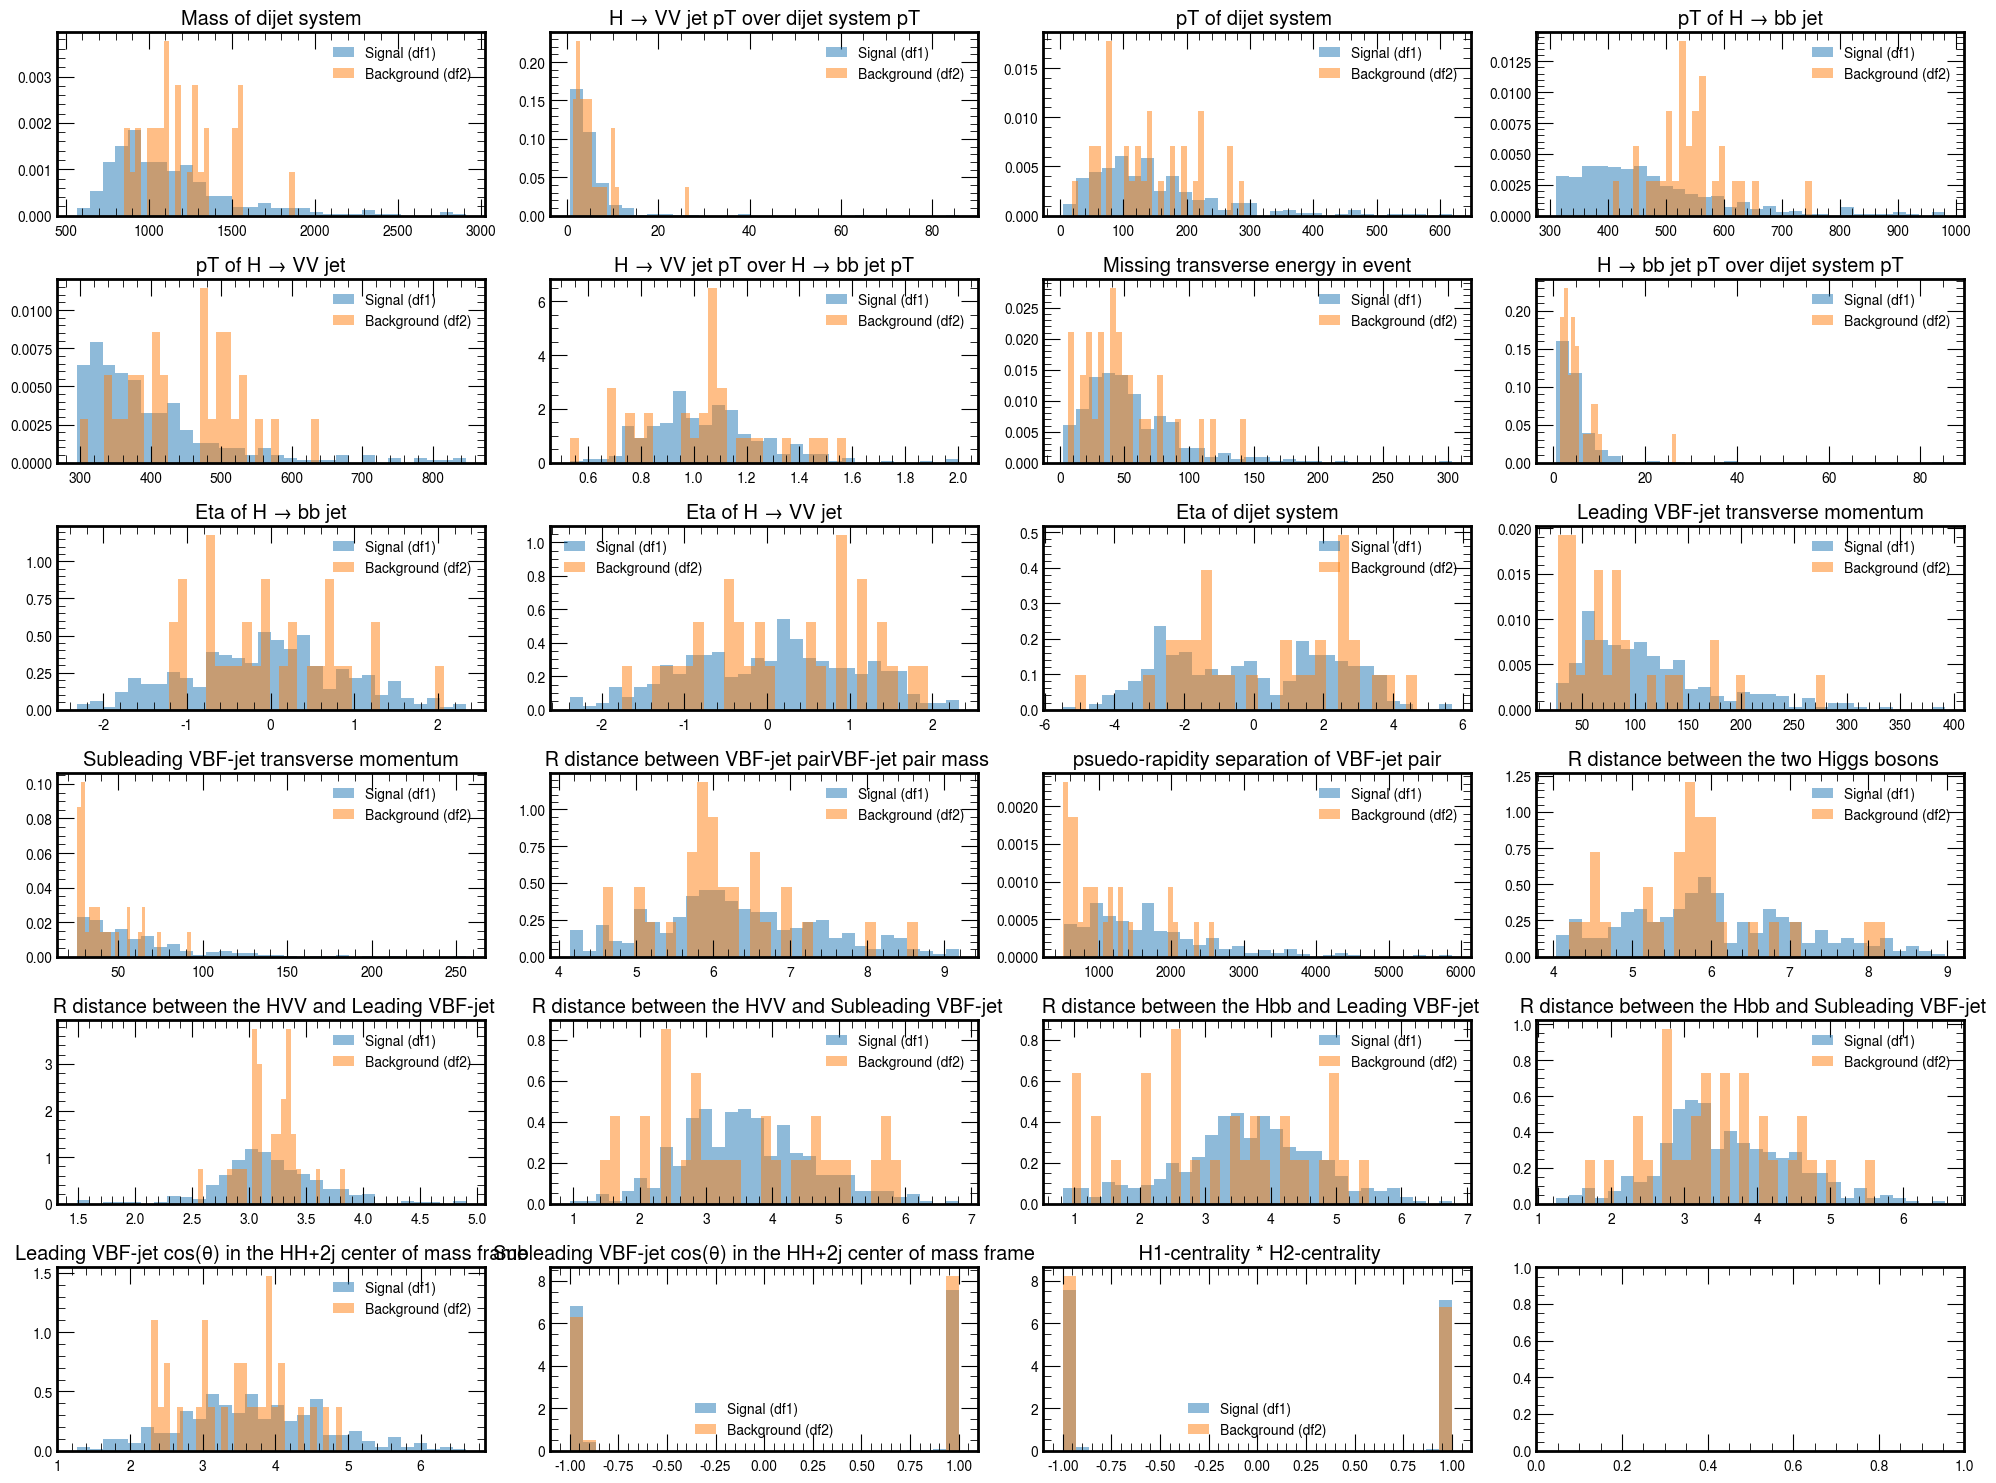

In [109]:
# fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)))

# for ax, var, label in zip(axes, variables, labels):
#     print(var)
#     # Select the appropriate column data and index
#     data1 = df1[var]
#     data2 = df2[var]

#     # Plot histograms
#     ax.hist(data1, bins=30, alpha=0.5, label='Signal (df1)')
#     ax.hist(data2, bins=30, alpha=0.5, label='Background (df2)')
#     ax.set_title(label)
#     ax.legend()

# # Adjust the layout
# plt.tight_layout()
# plt.show()

n_rows_grid = 6
n_cols_grid = 4
# Plot density histograms in the grid format
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(20, 15))

# Flatten the axes to iterate over them
flat_axes = axes.flatten()

for ax, var, label in zip(flat_axes, variables, labels):
    # Select the appropriate column data and index
    data1 = df1[var]
    data2 = df2[var]

    # Plot density histograms
    ax.hist(data1, bins=30, alpha=0.5, label="Signal (df1)", density=True)
    ax.hist(data2, bins=30, alpha=0.5, label="Background (df2)", density=True)
    ax.set_title(label)
    ax.legend()

# Remove unused subplots
for ax in flat_axes[len(variables) :]:
    ax.axis("off")

# Adjust the layout
plt.tight_layout()
plt.show()